In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from z3 import *

In [5]:
# Back to the first problem. Redoing withh Z3
url='https://www.janestreet.com/puzzles/january-2014-2/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
print("Puzzle")
print("~~~~~~")
print(" ".join(y[8:10]))

Puzzle
~~~~~~
Place a digit in each of the 25 spots in the below 5×5 grid, so that each 5-digit number (leading zeroes are ok) reading across and reading down is divisible by the number outside the grid, trying to maximize the sum of the 25 numbers you enter. An example of a completed grid with sum 100 is presented on the right. Please submit your answer (along with any other comments you want to provide) as an ordered pair of your sum, and your 25 numbers, reading left to right, top to bottom.


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2014/01/niedermaier1.png" width="350" >


Solved in 0.8457 seconds


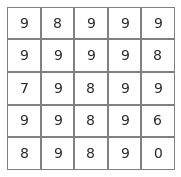

Sum is : 205


In [6]:
start = time.time()

######################################################
# Setup # 5x5 matrix of integer variables and solver #
######################################################
X = [[Int("x_%s_%s" % (i+1, j+1)) for j in range(5) ] for i in range(5)]

# Model
s = Optimize()
s.maximize(Sum([Sum([X[i][j] for j in range(5)]) for i in range(5)]))

# each cell contains a value in {0, ..., 9}
s += [And(0 <= X[i][j], X[i][j] <= 9) for i in range(5) for j in range(5)]

# Rows
s += Sum([X[1][i] *10**(4-i)  for i in range(5) ]) %  2 == 0
s += Sum([X[2][i] *10**(4-i)  for i in range(5) ]) %  3 == 0
s += Sum([X[3][i] *10**(4-i)  for i in range(5) ]) %  4 == 0
s += Sum([X[4][i] *10**(4-i)  for i in range(5) ]) %  5 == 0

# Cols
s += Sum([X[i][0] *10**(4-i)  for i in range(5) ]) %  6 == 0
s += Sum([X[i][1] *10**(4-i)  for i in range(5) ]) %  7 == 0
s += Sum([X[i][2] *10**(4-i)  for i in range(5) ]) %  8 == 0
s += Sum([X[i][3] *10**(4-i)  for i in range(5) ]) %  9 == 0
s += Sum([X[i][4] *10**(4-i)  for i in range(5) ]) % 10 == 0


###################
# Solve and print #
###################
if s.check() == sat:
    m = s.model()
    r = [[ m.evaluate(X[i][j]).as_long() for j in range(5) ] for i in range(5)]
else:
    print("Failed")
    
stop = time.time()
print("Solved in {:.4f} seconds".format(stop-start))
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax =sns.heatmap(np.zeros((5,5)),annot=r,cbar=False,cmap="Greys",fmt="",linewidths=1,linecolor ="grey",annot_kws={"size":14})
ax.axis("off")
plt.show()
print("Sum is :",np.sum(r))

In [4]:
url='https://www.janestreet.com/puzzles/solutions/january-2014-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:8]))

Solution
~~~~~~~~
The best solutions we received had a sum of 205; there were 3 entrants who managed to reach that total.   Congratulations to Tomas Vaškevičius for being randomly selected to win a Jane Street t-shirt!   His submission appears here.


### Solution
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2014/09/Jan14_Solution.png" width="600">
